## Running TFLite models
[Based on this course collab](https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_lite/tflite_c01_linear_regression.ipynb)

In [2]:
import tensorflow as tf

import pathlib
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [7]:
# Create a basic model of the form y = mx + c
x = [-1, 0, 1,2,3,4]
y = [-3,-1,1,3,5,7]

model = tf.keras.models.Sequential([
                    tf.keras.layers.Dense(units=1, input_shape=[1])       
])
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
model.fit(x,y, epochs=200, verbose = 1)


Epoch 1/200
1/1 [==============================] - 0s 1ms/step - loss: 23.9911 - accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 1ms/step - loss: 19.1606 - accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 1ms/step - loss: 15.3544 - accuracy: 0.0000e+00
Epoch 4/200
1/1 [==============================] - 0s 1ms/step - loss: 12.3541 - accuracy: 0.0000e+00
Epoch 5/200
1/1 [==============================] - 0s 1ms/step - loss: 9.9880 - accuracy: 0.0000e+00
Epoch 6/200
1/1 [==============================] - 0s 2ms/step - loss: 8.1209 - accuracy: 0.1667
Epoch 7/200
1/1 [==============================] - 0s 1ms/step - loss: 6.6466 - accuracy: 0.1667
Epoch 8/200
1/1 [==============================] - 0s 1ms/step - loss: 5.4814 - accuracy: 0.1667
Epoch 9/200
1/1 [==============================] - 0s 1ms/step - loss: 4.5595 - accuracy: 0.1667
Epoch 10/200
1/1 [==============================] - 0s 1ms/step - loss: 3.8291 - accuracy: 0.1667
Epoch

In [8]:
# generate a saved model
export_dir = 'saved/model/l'
tf.saved_model.save(model, export_dir)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved/model/l/assets


In [10]:
# converting the savedmodel to TFLite, I can also do it 
# directly from a keras model instead from a saved model

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

# This following step is optional, we do it if we want to download the tfLite model
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

652

In [22]:
# Inintialize the TFLite interpreter to try our tflite model
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output ternsors 
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input tensor \n")
display(input_details)
print("\n Output tensor \n ")
display(output_details)

Input tensor 



[{'dtype': numpy.float32,
  'index': 0,
  'name': 'dense_3_input',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([1, 1], dtype=int32),
  'shape_signature': array([1, 1], dtype=int32),
  'sparsity_parameters': {}}]


 Output tensor 
 


[{'dtype': numpy.float32,
  'index': 3,
  'name': 'Identity',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([1, 1], dtype=int32),
  'shape_signature': array([1, 1], dtype=int32),
  'sparsity_parameters': {}}]

In [23]:
# Test the lite model on random inputs

# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data)

  interpreter.invoke()
  tflite_results = interpreter.get_tensor(output_details[0]['index'])

  # Test the TensorFlow model on random input data.
  tf_results = model(tf.constant(input_data))
  output_data = np.array(tf_results)
  
  inputs.append(input_data[0][0])
  outputs.append(output_data[0][0])

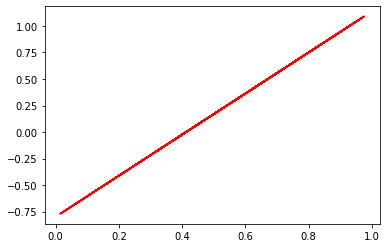

In [24]:
plt.plot(inputs, outputs, 'r')
plt.show()

In [ ]:
## Download the model if we want
# try:
#   from google.colab import files
#   files.download(tflite_model_file)
# except:
#   pass